# Illustration de la méthode de Monte-Carlo
par Pauline Guntzburger, Lucie Van Nieuwenhuyze et Alban Gossard

**Attention : ** Il faut exécuter le script cpp_core/toCompile.sh dans l'environnement de ce notebook afin de pouvoir importer la librairie MC qui repose sur du code C++.

In [2]:
from __future__ import print_function
import sys
sys.path.append('cpp_core/')

import numpy as np
import matplotlib.pyplot as plt

from MC import *

Affichage graphique

In [4]:
def plot(x,y, t=None):
    fig_kw={'figsize':(13,6)}
    f, (ax1, ax2) = plt.subplots(1, 2, **fig_kw)
    ax1.plot(x, y)
    ax1.set_title('y=f(x)')
    if t is None:
        ax2.plot(x, color='red', label='x')
        ax2.plot(y, color='green', label='y')
        ax2.set_title('Evolution des variables au cours des itérations')
    else:
        ax2.plot(t, x, color='red', label='x')
        ax2.plot(t, y, color='green', label='y')
        ax2.set_title('Evolution des variables au cours du temps')
    plt.legend()
    plt.show()

In [5]:
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 40, fill = ' '):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print('\r%s |%s| %s%% %s' % (prefix, bar, percent, suffix), end = '\r')
    if iteration == total: 
        print()

Fonction de simulation

In [6]:
def run(T=5e2,dt=5e-4):
    beta=2.
    delta=1.
    lambda1=1. 
    lambda2=1.
    alpha=np.random.exponential(1./lambda1)
    gamma=np.random.exponential(1./lambda2)

    Nt=1+int(T/dt)
    x=np.zeros(Nt); x[0]=1.
    y=np.zeros(Nt); y[0]=2.

    runMC(x, y, T, alpha, beta, delta, gamma)

    return x,y, alpha, beta, delta, gamma, T, dt

# Test d'une simulation

1.2208915320133293 2.0 1.0 1.8230397726418108
x(T)=0.17304424006
y(T)=0.602439573383


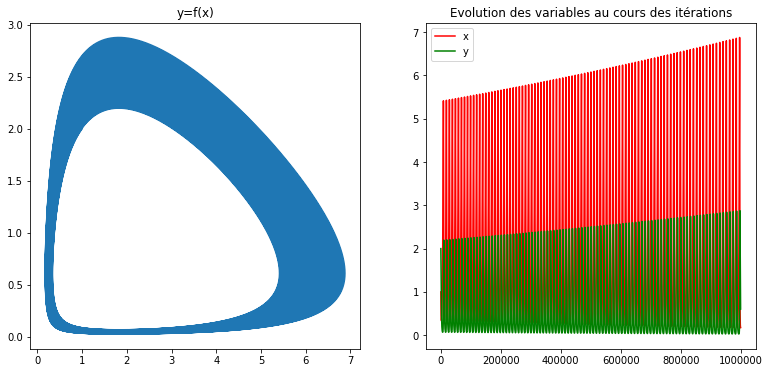

In [7]:
x,y, alpha, beta, delta, gamma, _, _ = run()
print(alpha, beta, delta, gamma)
print('x(T)='+str(x[-1]))
print('y(T)='+str(y[-1]))
plot(x,y)

# Simulation par méthode de Monte-Carlo

In [8]:
Ntest=1000*0+5000

list_x_val=np.zeros(Ntest)
list_y_val=np.zeros(Ntest)

list_val1_CV=np.zeros(Ntest)
list_val2_CV=np.zeros(Ntest)

for id_test in range(Ntest):
    x,y, alpha, beta, delta, gamma, T, dt = run()
    if not np.isfinite(np.sum(x)+np.sum(y)):
        # plot(x,y)
        print('stop',id_test)
        print(alpha, beta, delta, gamma)
        break
    list_x_val[id_test]=np.sum(x)*dt/T
    list_y_val[id_test]=np.sum(y)*dt/T
    list_val1_CV[id_test]=gamma/delta
    list_val2_CV[id_test]=alpha/beta
    if id_test%10==0:
        printProgressBar(id_test, Ntest, str(id_test), str(Ntest), 1, 40, '#')
Ex=np.sum(list_x_val)/list_x_val.shape[0]
Ey=np.sum(list_y_val)/list_y_val.shape[0]
E_val1_CV=np.sum(list_val1_CV)/list_val1_CV.shape[0]
E_val2_CV=np.sum(list_val2_CV)/list_val2_CV.shape[0]
Varx=np.sum((list_x_val-Ex)**2.)/list_x_val.shape[0]
Vary=np.sum((list_y_val-Ey)**2.)/list_y_val.shape[0]
Nalpha2=1.96
ICx=[Ex-np.sqrt(Varx)*Nalpha2/np.sqrt(Ntest), Ex+np.sqrt(Varx)*Nalpha2/np.sqrt(Ntest)]
ICy=[Ey-np.sqrt(Vary)*Nalpha2/np.sqrt(Ntest), Ey+np.sqrt(Vary)*Nalpha2/np.sqrt(Ntest)]

print('\n\n')
print('E(f(x))='+str(Ex))
print('E(f(y))='+str(Ey))
print('E(gamma/delta)='+str(E_val1_CV))
print('E(alpha/beta)='+str(E_val2_CV))
print('Var(f(x))='+str(Varx))
print('Var(f(y))='+str(Vary))
print('IC(E(f(x)))='+str(ICx))
print('IC(E(f(y)))='+str(ICy))


4990 |#######################################-| 99.8% 5000


E(f(x))=0.972609706318
E(f(y))=0.526250237315
E(gamma/delta)=1.00033799732
E(alpha/beta)=0.511096526165
Var(f(x))=1.01024750257
Var(f(y))=0.270116840371
IC(E(f(x)))=[0.9447494593491027, 1.000469953287271]
IC(E(f(y)))=[0.51184412157217518, 0.54065635305770687]
